# # Travel Service Analysis

# Importing all essential libraries: pandas, NumPy, Matplotlib, and Seaborn.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataframe and naming it as df.

In [28]:
df=pd.read_csv(r"C:/Power_BI/Project/Data/train.csv")

In [29]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Looking at the data types and null values of the columns in the dataframe

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Converting pickup_datetime and dropoff_datetime to datetime type

In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [32]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

# Creating a list of all numerical columns for potential direct use in further analysis if needed

In [33]:
numerical_columns = ['trip_durtion', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Statistical factors of the dataframe

In [34]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


# Checking the number of columns and rows available in the dataframe

In [35]:
df.shape

(1458644, 11)

# Removing Duplicates from dataframe

In [36]:
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)

# It's not logically possible for people to take a trip lasting just 59 seconds, as trip_duration is measured in seconds. Therefore, we will remove rows from the dataframe where the duration is less than 59 seconds.

In [37]:
df = df[df['trip_duration'] >= 59]

# Checking the shape again to identify the data we lost

In [38]:
df.shape

(1450204, 11)

In [39]:
100-(1450204/1458644)*100

0.5786195946372032

# Summary

After cleaning up the unnecessary rows, we lost approximately less than 1% of the data, which is negligible

# Creating sub-columns from the pickup and dropoff columns to enable day-wise and month-wise analysis. Additionally, I've converted the trip duration from seconds to hours to make it more suitable for generalization

In [40]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_month'] = df['pickup_datetime'].dt.month_name()

In [41]:
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_month'] = df['dropoff_datetime'].dt.month_name()

# Checking the dataframe again to see our newly added columns.

In [42]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_hour,pickup_month,dropoff_day,dropoff_hour,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,17,March,Monday,17,March
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,0,June,Sunday,0,June
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,11,January,Tuesday,12,January
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,19,April,Wednesday,19,April
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,13,March,Saturday,13,March


# checking datatype

In [43]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
pickup_hour                    int32
pickup_month                  object
dropoff_day                   object
dropoff_hour                   int32
dropoff_month                 object
dtype: object

# Analyzing the trend to identify which days have the highest and lowest number of pickups

In [44]:
df['Day_name'] = df['pickup_day'].astype('category')
df['Day_name'].value_counts()

Day_name
Friday       222265
Saturday     219622
Thursday     217281
Wednesday    209043
Tuesday      201639
Sunday       194053
Monday       186301
Name: count, dtype: int64

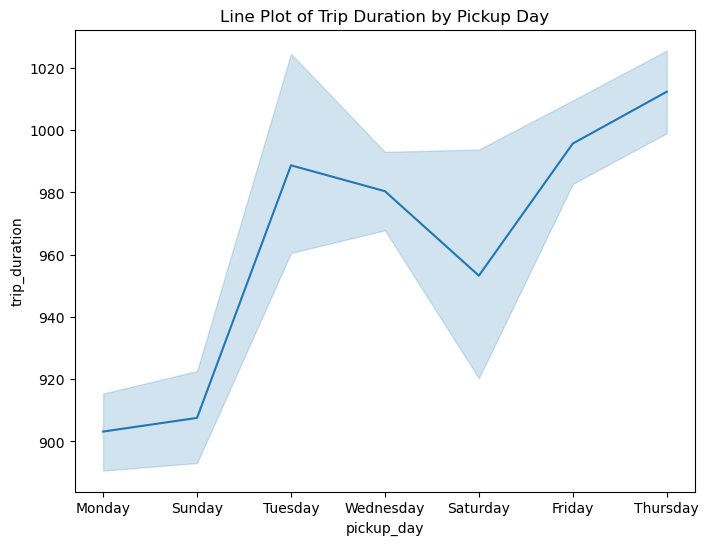

In [45]:
plt.figure(figsize=(8,6))
sns.lineplot(x='pickup_day', y='trip_duration', data=df)
plt.title('Line Plot of Trip Duration by Pickup Day')
plt.show()


# Summary 

It is observed that Thursday has the highest number of pickups, followed by Friday. Conversely, Monday has the least number of pickups.

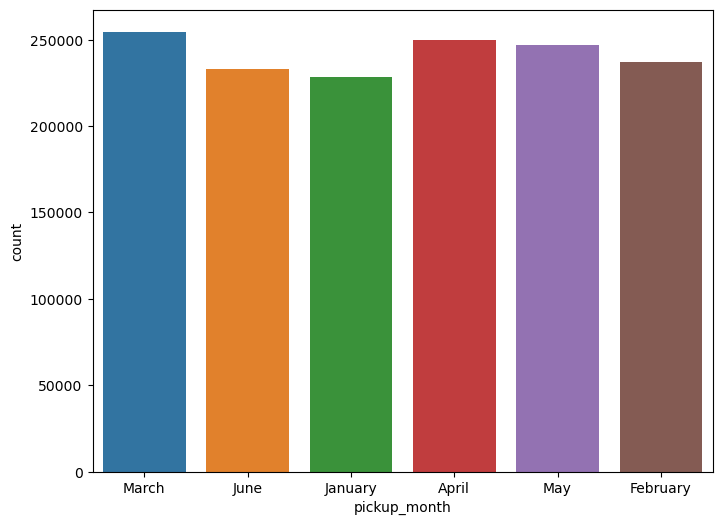

In [46]:
plt.figure(figsize=(8, 6))
PMC = sns.countplot(x='pickup_month', data=df)

# Summary 

March has the most pickups, followed by April. January has the fewest pickups. This shows a seasonal pattern, with more pickups in the summer, which is also the end and start of the financial year.

# Traveler Group Sizes analysis

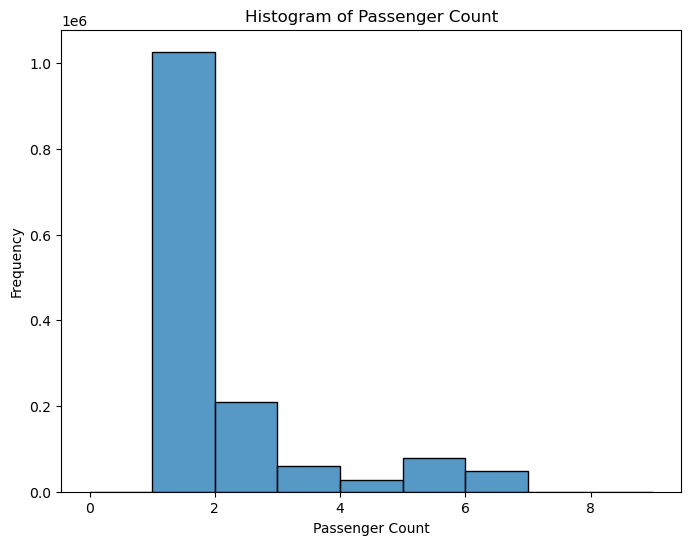

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['passenger_count'], bins=len(df['passenger_count'].unique()), kde=False)
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

# Summary 

In summary, most people tend to travel alone rather than in groups.

# Creating categories to show when people travel the most

In [48]:
df['pickup_prefered_time'] = pd.cut(x = df['pickup_hour'],bins=[1,6,9,12,15,18,21,24])

df['pickup_prefered_time'].value_counts(normalize=True)

pickup_prefered_time
(18, 21]    0.189312
(15, 18]    0.169297
(12, 15]    0.159187
(9, 12]     0.150628
(6, 9]      0.139342
(21, 24]    0.110004
(1, 6]      0.082230
Name: proportion, dtype: float64

<Axes: xlabel='pickup_prefered_time', ylabel='count'>

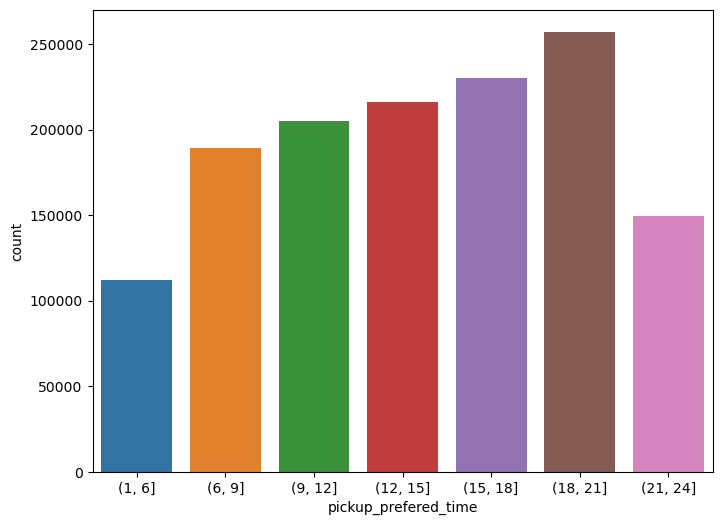

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pickup_prefered_time',data=df)

# Summary

In the above plot, we observe that people mostly travel between 18:00 and 21:00, with the least activity occurring between 01:00 and 06:00

# Vendor Performance Overview

In [50]:
df['vendor_id'].value_counts()

vendor_id
2    776872
1    673332
Name: count, dtype: int64

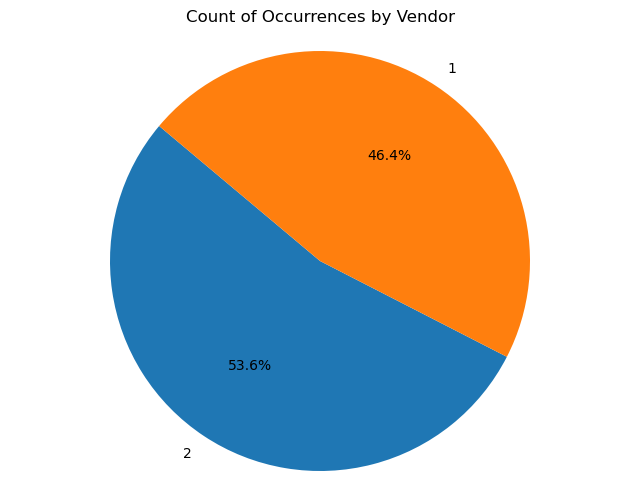

In [51]:
vendor_counts = df['vendor_id'].value_counts()

# Plot using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Occurrences by Vendor')
plt.axis('equal')  
plt.show()

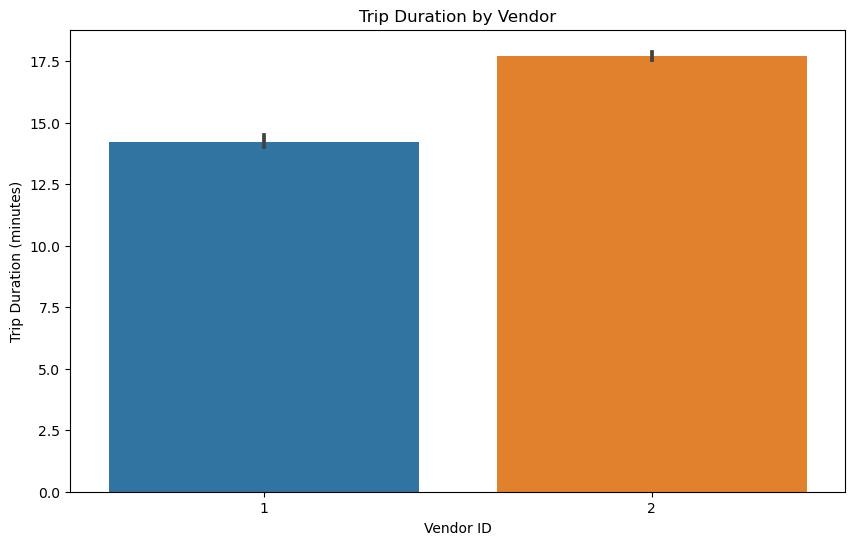

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='vendor_id', y=df['trip_duration'] / 60, data=df)  # converting seconds to minutes
plt.title('Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (minutes)')
plt.show()

# Summary

The vendor 2 has the highest number of trips and also the highest average trip duration